In [86]:
# from keras.datasets import mnist

In [87]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [88]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [89]:
X_test.shape

(10000, 32, 32, 3)

In [90]:
y_train.shape

(50000, 1)

In [91]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [92]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [93]:
y_test = y_test.reshape(-1,)

In [94]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [95]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

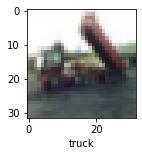

In [96]:
plot_sample(X_train, y_train, 2)

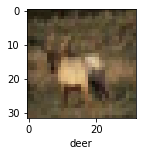

In [97]:
plot_sample(X_train, y_train, 3)

In [98]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [99]:
# ann = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(10, activation='softmax')    
#     ])

# ann.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# ann.fit(X_train, y_train, epochs=5)

In [100]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np
# y_pred = ann.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [101]:
# cnn = keras.Sequential([
    
#     layers.Conv2D(30, (3,3), activation='sigmoid', input_shape=(32, 32, 1)),
#     layers.MaxPooling2D((2,2)),
 
#     layers.Flatten(),
#     layers.Dense(100, activation='sigmoid'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

In [102]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [103]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5215 - accuracy: 0.4463
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1454 - accuracy: 0.5944
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0016 - accuracy: 0.6504
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9038 - accuracy: 0.6846
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8320 - accuracy: 0.7099
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7758 - accuracy: 0.7309
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7245 - accuracy: 0.7464
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6766 - accuracy: 0.7636
Epoch 9/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6397 - accuracy: 0.7774
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

In [105]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.1081 - accuracy: 0.6846


[3.108102560043335, 0.6845999956130981]

In [106]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0000000e+00, 9.9999619e-01, 9.9985647e-01, 1.0000000e+00,
        8.0310269e-07, 1.0000000e+00, 8.6892750e-03, 9.9481213e-01,
        9.9999571e-01, 5.3491362e-04],
       [9.9444360e-01, 1.0000000e+00, 3.7041947e-14, 2.9821809e-12,
        3.3603442e-08, 5.3593952e-17, 6.0171394e-17, 1.9912492e-05,
        1.0000000e+00, 9.9999940e-01],
       [1.0261188e-01, 9.9970502e-01, 9.3252584e-04, 8.3548147e-03,
        1.0290448e-02, 1.3749546e-06, 1.0021730e-07, 4.6332744e-01,
        9.9828929e-01, 9.9943537e-01],
       [1.0000000e+00, 9.9646962e-01, 9.9589753e-01, 7.4320692e-01,
        9.8460788e-01, 2.6660308e-07, 8.3877409e-01, 4.7925743e-12,
        1.0000000e+00, 9.9983883e-01],
       [4.7118007e-18, 6.6989978e-16, 3.8704831e-02, 9.8147154e-01,
        9.9998844e-01, 4.7442122e-10, 1.0000000e+00, 9.3436523e-19,
        1.8306124e-05, 1.1392145e-18]], dtype=float32)